In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import nltk 
from time import time
from collections import Counter
from nltk.corpus import stopwords
from nltk import FreqDist,ngrams,word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/usr/local/lib/python2.7/dist-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/usr/local/lib/python2.7/dist-packages/pandas/core/indexes/base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate bi

In [5]:
def remove_stopwords(data):
    stop_words = Counter(stopwords.words('english'))
    ans = []
    for each in data:
        if(each not in stop_words.keys()):
            ans.append(each)
    return ans

In [6]:
def lemmatizer(data):
    lmtzr = WordNetLemmatizer()
    ans = []
    for each in data:
        ans.append(lmtzr.lemmatize(each))
    return ans

In [7]:
def stemmer(data):
    ps = PorterStemmer()
    ans = []
    for each in data:
        ans.append(ps.stem(each))
    return ans

In [110]:
def A1_task1(dataset, sw = 0, st = 0, lem= 0):
    data = pd.read_csv(dataset)
    print data.shape
    
    # concatenation
    text = ""
    for i in range(data.shape[0]):
        text += data['Text'][i]
    text = text.decode('utf-8')
    
    tokens = word_tokenize(text[0:2000])
    if(sw):
        tokens = remove_stopwords(tokens)
    if(lem):
        tokens = lemmatizer(tokens)
    if(st):
        tokens = stemmer(tokens)
        
    fDist = FreqDist(tokens)
    dictionary = dict(zip(fDist.keys(),fDist.values()))
    sorted_dict = sorted(dictionary.items(), key=lambda x: x[1],reverse= True)
   
    x = np.arange(0,len(sorted_dict))
    y = [sorted_dict[i][1] for i in range(len(sorted_dict))]
    plt.plot(x,y,'r')
    plt.plot(x,y,'b.')
    plt.xlabel("Rank")
    plt.ylabel("Frequency")
    plt.show()                  
     
    print "TOP 20 Words : "
    for i in range(20): 
        print str(i+1)+". "+sorted_dict[i][0]," : ",sorted_dict[i][1]

(32577, 2)


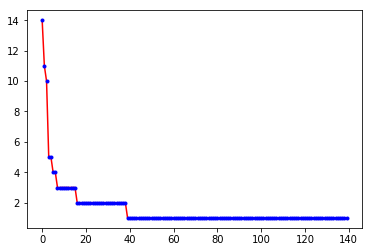

TOP 20 Words : 
1. ,  :  14
2. ?  :  11
3. secur  :  10
4. cours  :  5
5. data  :  5
6. input  :  4
7. .  :  4
8. (  :  3
9. applic  :  3
10. could  :  3
11. softwar  :  3
12. question  :  3
13. offer  :  3
14. n't  :  3
15. )  :  3
16. rail  :  3
17. code  :  2
18. web  :  2
19. somebodi  :  2
20. know  :  2
None
1.1537539959


In [111]:
start = time()
s = A1_task1('questions-data.csv', 1, 1, 1)
print(s)
end = time()
print end-start

(32577, 2)


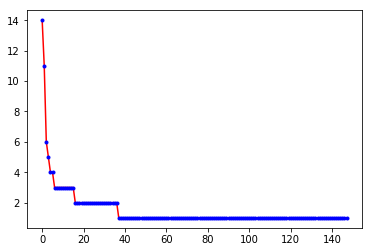

TOP 20 Words : 
1. ,  :  14
2. ?  :  11
3. security  :  6
4. data  :  5
5. secure  :  4
6. .  :  4
7. (  :  3
8. input  :  3
9. courses  :  3
10. )  :  3
11. could  :  3
12. software  :  3
13. rails  :  3
14. question  :  3
15. n't  :  3
16. application  :  3
17. code  :  2
18. course  :  2
19. issues  :  2
20. web  :  2
None
1.2501540184


In [112]:
start = time()
s = A1_task1('questions-data.csv', 1, 0, 0)
print(s)
end = time()
print end-start

(32577, 2)


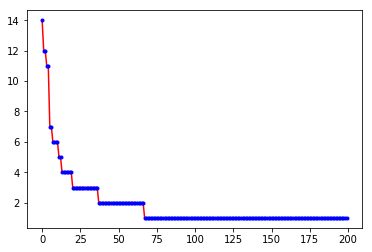

TOP 20 Words : 
1. ,  :  14
2. to  :  12
3. the  :  12
4. ?  :  11
5. i  :  11
6. be  :  7
7. a  :  7
8. security  :  6
9. with  :  6
10. and  :  6
11. is  :  6
12. of  :  5
13. data  :  5
14. what  :  4
15. or  :  4
16. secure  :  4
17. .  :  4
18. that  :  4
19. this  :  4
20. it  :  4
1.0460729599


In [113]:
start = time()
A1_task1('questions-data.csv', 0)
end = time()
print end-start

In [12]:
def A1_task2(dataset):
    data = pd.read_csv(dataset)
    print data.shape
    dictionary = set()
    num_tokens = 0 
    T = []
    M = []
    for i in range(data.shape[0]):
        text = data['Text'][i]
        text = text.decode('utf-8')
        tokens = word_tokenize(text)
        for t in tokens:
            dictionary.add(t) 
        num_tokens += len(tokens)
        T.append(num_tokens)
        M.append(len(dictionary))
    return T,M
        

In [13]:
Terms,Dictionary = A1_task2('questions-data.csv')


(32577, 2)


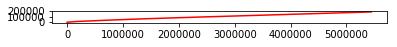

In [15]:
x = np.arange(0,len(Terms))
plt.plot(Terms,Dictionary,'r', )
plt.axis('scaled')
plt.show()
